In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import requests
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [62]:
class task_generator:
    def __init__(self, n, k):
        self.n = n
        self.k = k
        self.A = self.generate_a()
        self.b = self.generate_b()

    def generate_a(self) -> np.ndarray:
        diagonal_elements = np.random.randint(1, self.k+1, size=self.n)

        diagonal_elements[np.min(diagonal_elements) == diagonal_elements] = 1
        diagonal_elements[np.max(diagonal_elements) == diagonal_elements] = self.k

        diagonal_matrix = np.diag(diagonal_elements)

        return diagonal_matrix

    def generate_b(self) -> np.ndarray:
        b = np.random.random(self.n)
        return b # strange assertion

    def f(self, x: np.ndarray) -> float:
        return np.dot(x.T, np.dot(self.A, x)) + np.dot(self.b.T, x)
    
    def grad(self, x: np.ndarray) -> np.ndarray:
        return 2 * np.dot(self.A, x) + self.b
    
    def norm(self, x: np.ndarray) -> int:
        norm = np.sqrt(np.dot(x.T, x))
        return norm

    def gradient_descent(self, alpha: float, x0: np.ndarray, eps: float = 10e-5, max_iters: int = 10000) -> np.ndarray:
        dots: list = []
        x = x0
        norm0 = self.norm(self.grad(x0))
        for _ in range(max_iters):
            norm = self.norm(self.grad(x))
            if norm <= eps * norm0:
                return np.array(dots)
            dots.append(x)
            x = x - alpha * self.grad(x)
        return np.array(dots)

In [71]:
def plot_function_with_gradients_and_points(func, points, x_range=(-5, 5), y_range=(-5, 5), resolution=100):
    """
    Plot a 2D function with its contours, gradient level curves, and given points.
    
    Parameters:
    func (callable): A function of two variables (x, y)
    points (numpy.ndarray): Array of shape (n, 2) containing points to plot
    x_range, y_range (tuple): Ranges for x and y axes
    resolution (int): Number of points in each dimension for the mesh grid
    """
    # Create a mesh grid for the contour plot
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)

    # Combine the X and Y coordinates into a single array, (x, y) pairs
    coordinates = np.stack((X.ravel(), Y.ravel()), axis=-1)

    # Compute function values on the grid
    Z_flat = np.array([func(coord) for coord in coordinates])  # Use a list comprehension

    # Reshape Z_flat to the original grid shape
    Z = Z_flat.reshape(X.shape)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot contour lines (level curves)
    contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)
    
    # Plot the filled contour to show the function values
    plt.contourf(X, Y, Z, levels=20, alpha=0.6, cmap='viridis')
    
    # Add a color bar
    plt.colorbar(label='Function Value')
    
    # Plot the points
    print(f'Gradient descent size: {points.shape[0]}')
    plt.scatter(points[:, 0], points[:, 1], color='red', s=10, marker='o', label='Points')
    
    # Set labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function Contours with Points')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


# Gradient descent

Gradient descent size: 4141


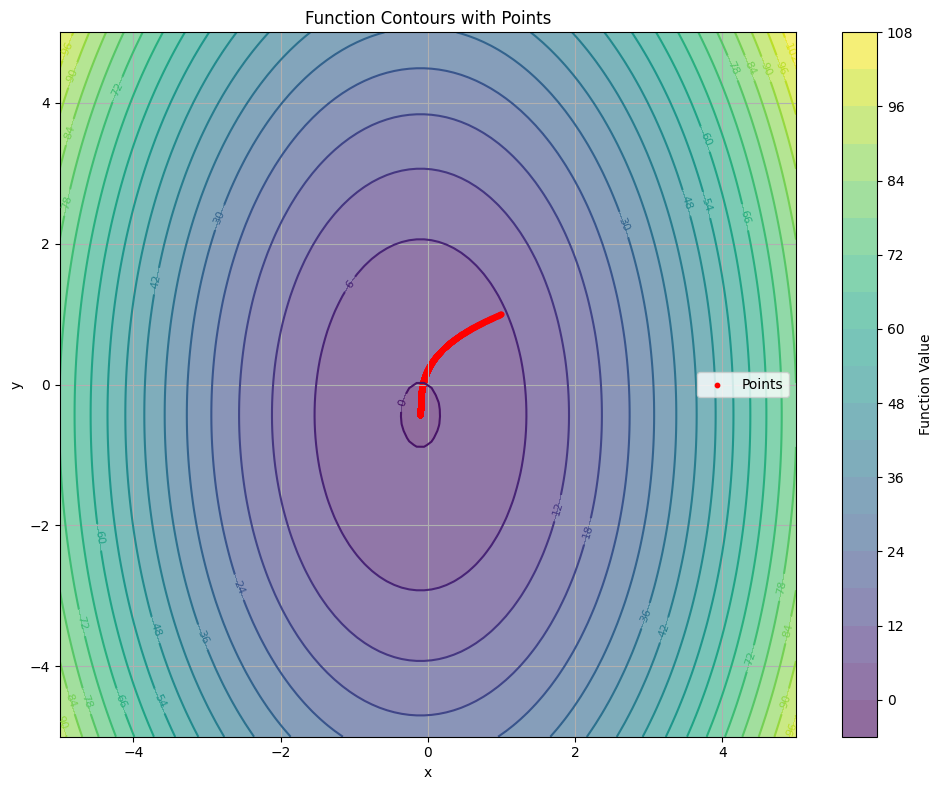

In [72]:
n, k = 2, 3

task = task_generator(n, k)
dots = task.gradient_descent(0.001, np.array((1, 1)))
plot_function_with_gradients_and_points(task.f, dots)

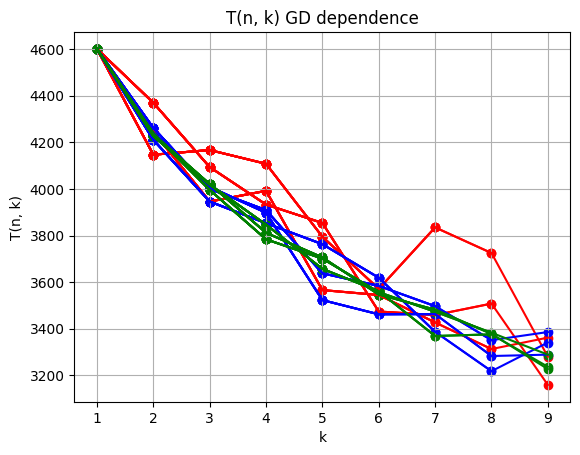

In [91]:
lr = 0.001
iter_count = 3
N = [10, 100, 1000]
colors = ['red', 'blue', 'green']
for n, color in zip(N, colors):
  for iter in range(iter_count):
    T = []
    K = []
    for k in range(1, 10):
      task = task_generator(n, k)
      t = task.gradient_descent(lr, np.ones(n)).shape[0]
      T.append(t)
      K.append(k)
      plt.scatter(K, T, color=color)
      plt.plot(K, T, color=color)

plt.xlabel("k")
plt.ylabel("T(n, k)")
plt.title("T(n, k) GD dependence")
plt.grid(True)
plt.show()

# Accelerated methods

In [114]:
def f(x):
    if isinstance(x, np.ndarray):
        result = np.zeros_like(x, dtype=float)
        
        mask1 = x < 1
        mask2 = (x >= 1) & (x < 2)
        mask3 = x >= 2
        
        result[mask1] = 25/2 * x[mask1]**2
        result[mask2] = 1/2 * x[mask2]**2 + 24*x[mask2] - 12
        result[mask3] = 25/2 * x[mask3]**2 - 24*x[mask3] + 36
        
        return result
    else:
        if x < 1:
            return 25/2 * x**2
        elif 1 <= x < 2:
            return 1/2 * x**2 + 24*x - 12
        else:  # x >= 2
            return 25/2 * x**2 - 24*x + 36

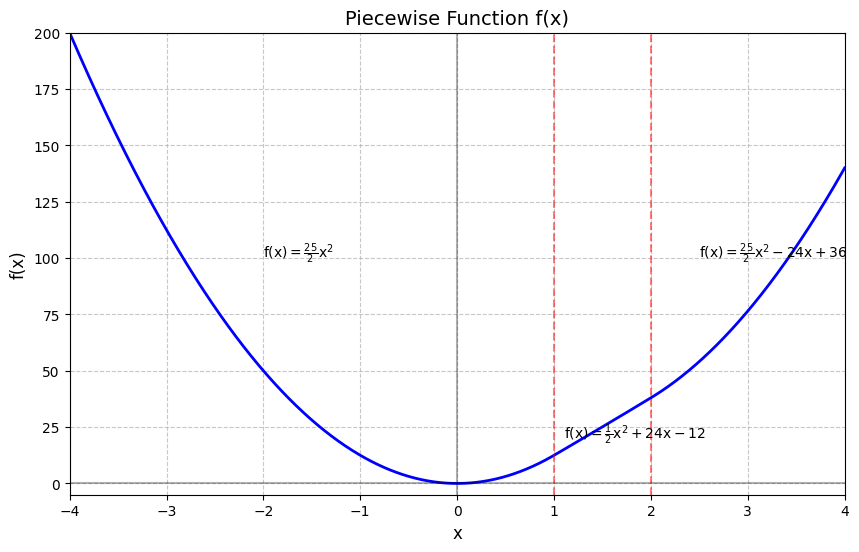

In [115]:
# Create x values from -4 to 4
x = np.linspace(-4, 4, 1000)
y = f(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Add vertical lines at transition points
plt.axvline(x=1, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5)

# Add labels and title
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Piecewise Function f(x)', fontsize=14)

# Add annotations for the different regions
plt.text(-2, 100, r'$f(x) = \frac{25}{2}x^2$', fontsize=10)
plt.text(1.1, 20, r'$f(x) = \frac{1}{2}x^2 + 24x - 12$', fontsize=10)
plt.text(2.5, 100, r'$f(x) = \frac{25}{2}x^2 - 24x + 36$', fontsize=10)

plt.xlim([-4, 4])
plt.ylim([-5, 200])  # Adjust y-range to show important features

plt.show()

In [133]:
class taskf:
    def __init__(self, mu, L):
        self.mu = mu
        self.L = L
        self.alpha_opt = 4 / (np.sqrt(self.L) + np.sqrt(self.mu))**2
        self.beta_opt = (np.sqrt(self.L) - np.sqrt(self.mu))**2 / (np.sqrt(self.L) + np.sqrt(self.mu))**2

    def f(self, x: float) -> float:
        if x < 1:
            return 25/2 * x**2
        elif 1 <= x < 2:
            return 1/2 * x**2 + 24*x - 12
        else:  # x >= 2
            return 25/2 * x**2 - 24*x + 36
    
    def grad(self, x: float) -> float:
        if x < 1:
            return 25 * x
        elif 1 <= x < 2:
            return x + 24
        else:  # x >= 2
            return 25 * x - 24

    def norm(self, x: float):
        return np.abs(x)

    def gradient_descent(self, alpha: float, x0: float, eps: float = 10e-5, max_iters: int = 10000) -> np.ndarray:
        dots: list = []
        x = x0
        norm0 = self.norm(self.grad(x0))
        for _ in range(max_iters):
            norm = self.norm(self.grad(x))
            if norm <= eps * norm0:
                return np.array(dots)
            dots.append(x)
            x = x - alpha * self.grad(x)
        return np.array(dots)

    def heavy_ball_descent(self, alpha: float, beta: float, x0: float, num_iterations: int = 30) -> np.ndarray:
        x = np.zeros(num_iterations + 1)
        x_prev = x0
        x_curr = x0  # Initialize x[1] same as x[0] to start the algorithm
        for i in range(num_iterations):
            x[i] = x_curr
            x_new = x_curr - alpha * self.grad(x_curr) + beta * (x_curr - x_prev)
            x_prev = x_curr
            x_curr = x_new
        x[num_iterations] = x_curr
        return x

In [139]:
task = taskf(1, 25)

# Heavy Ball method implementation
heavy_ball_method = task.heavy_ball_descent

# Parameters
L = task.L
mu = task.mu

# Function for updating the animation
def update(i):
    ax1.clear()
    ax2.clear()

    # Plot f(x) and trajectory
    x_vals = np.linspace(-4, 4, 100)
    f_vals = np.piecewise(x_vals, [x_vals < 1, (x_vals >= 1) & (x_vals < 2), x_vals >= 2],
                        [lambda x: 12.5 * x**2, lambda x: .5 * x**2 + 24 * x - 12, lambda x: 12.5 * x**2 - 24 * x + 36])
    ax1.plot(x_vals, f_vals, 'b-')
    ax1.plot(trajectory[:i], [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]], 'ro-')
    # Add vertical dashed lines at x=1 and x=2 on the left subplot
    ax1.axvline(x=1, color='navy', linestyle='--')
    ax1.axvline(x=2, color='navy', linestyle='--')

    # Plot function value from iteration
    f_trajectory = [None for x in trajectory]
    f_trajectory[:i] = [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]]
    ax2.plot(range(len(trajectory)), f_trajectory, 'ro-')
    ax2.set_xlim(0, len(trajectory))
    ax2.set_ylim(min(f_vals), max(f_vals))
    # Add horizontal dashed lines at f(1) and f(2) on the right subplot
    f_1 = 12.5 * 1.0**2
    f_2 = .5 * 2.**2 + 24 * 2. - 12
    ax2.axhline(y=f_1, color='navy', linestyle='--')
    ax2.axhline(y=f_2, color='navy', linestyle='--')

    # ax1.set_title("Function f(x) and Trajectory")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.grid(linestyle=":")

    # ax2.set_title("Function Value from Iteration")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("f(x)")
    ax2.grid(linestyle=":")

    plt.tight_layout()

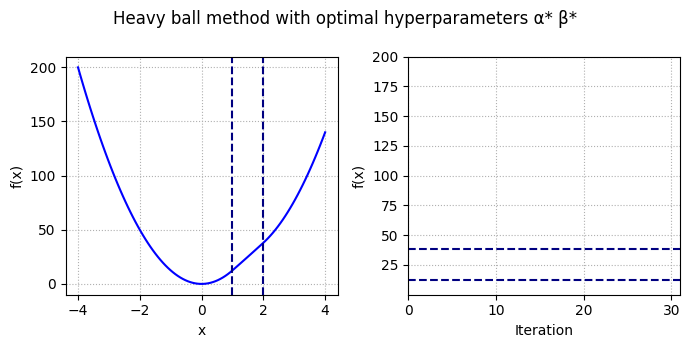

In [140]:
alpha_star = task.alpha_opt
beta_star = task.beta_opt
x0 = 3.5
num_iterations = 30

# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

We can see convergence

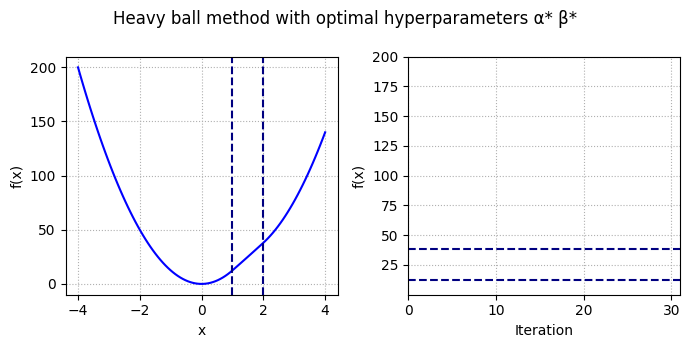

In [141]:
alpha_star = task.alpha_opt
beta_star = task.beta_opt
x0 = 3.4 # change
num_iterations = 30

# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

We can see no convergence. The Heavy Ball Method with **optimal hyperparameters** successfully minimizes \( f(x) \), reducing oscillations and leading to faster convergence. If needed, further tuning could refine stability while maintaining acceleration benefits.

**Explanation:** this counterexample was provided in the paper, while the global convergence of the heavy ball method for general smooth strongly convex function was introduced in another paper. Recently, it was suggested, that the heavy-ball (HB) method provably does not reach an accelerated convergence rate on smooth strongly convex problems.

Lets change the hyperparameter $\alpha^{\text{Global}} = \frac2L, \beta^{\text{Global}} = \frac{\mu}{L}$ and run the method again from $x_0 = 3.4$. Check whether you have accelerated convergence here.

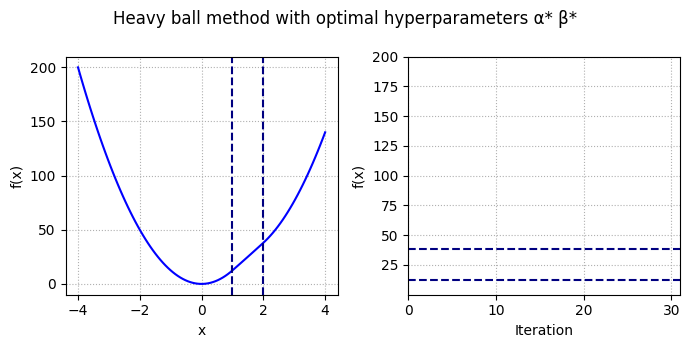

In [142]:
alpha_star = 2 / task.L
beta_star = task.mu / task.L
x0 = 3.4 # change
num_iterations = 30

# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

We will work with the real-world data for $A$ and $b$: take the mushroom dataset. I'll be careful, I will need to predict if the mushroom is poisonous or edible. A poor model can cause death in this exercise.

In [2]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [3]:
# URL of the file to download
url = 'https://hse24.fmin.xyz/files/mushrooms.txt'

# Download the file and save it locally
response = requests.get(url)
dataset = 'data/mushrooms.txt'

# Ensure the request was successful
if response.status_code == 200:
    with open(dataset, 'wb') as f:
        f.write(response.content)

    # Load the dataset from the downloaded file
    data = load_svmlight_file(dataset)
    A, b = data[0].toarray(), data[1]
    n, d = A.shape

    print("Data loaded successfully.")
    print(f"Number of samples: {n}, Number of features: {d}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

Data loaded successfully.
Number of samples: 8124, Number of features: 112


Divide the data into two parts: training and test. We will train the model on the $A_{train}$, $b_{train}$ and measure the accuracy of the model on the $A_{test}$, $b_{test}$.

In [4]:
# Split the data into training and test sets
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=214)

In [5]:
A_train.shape, A_test.shape, b_train.shape, b_test.shape

((6499, 112), (1625, 112), (6499,), (1625,))

In [24]:
class LogReg:
  def __init__(self, A_train: np.ndarray, A_test: np.ndarray, b_train: np.ndarray, b_test: np.ndarray, lam: float, mu: float, L: float):
    assert(A_train.shape[1:] == A_test.shape[1:])
    assert(b_train.shape[1:] == b_test.shape[1:])

    self.m, self.n = A_train.shape
    self.A_train = A_train
    self.A_test = A_test
    self.b_train = b_train
    self.b_test = b_test
    self.mu, self.L = mu, L
    self.lam = lam

    self.w = np.zeros(self.n)

  def loss(self, w, X, y):
      m = X.shape[0]
      logits = -y * (X @ w)  # Compute b_i * <a_i, x>
      log_loss = np.log(1 + np.exp(logits)).mean()  # Take the mean over all samples
      reg_term = (self.lam / 2) * self.norm(w) ** 2  # L2 regularization term
      return log_loss + reg_term

  def grad(self, w: np.ndarray, A: np.ndarray, b: np.ndarray) -> np.ndarray:
      m, n = A.shape
      scores = A @ w
      probs = 1 / (1 + np.exp(b * scores))
      grad = (-1/m) * (A.T @ (b * probs)) + self.lam * w
      return grad

  def norm(self, x: np.ndarray):
     return np.linalg.norm(x, ord=2)

  def heavy_ball(self, beta: float = 0, max_iter: int = 10000, tol: float = 1e-6) -> list:
    loss_list = []
    w_curr = np.zeros(self.n)  # Initialize x
    w_prev = np.zeros(self.n)  # Previous iterate

    alpha = 1 / self.L

    for _ in range(max_iter):
        loss_list.append(self.loss(w_curr, self.A_train, self.b_train))
        grad = self.grad(w_curr, self.A_train, self.b_train)
        w_new = w_curr - alpha * grad + beta * (w_curr - w_prev)  # Heavy Ball update
        # Check convergence
        if self.norm(w_new - w_curr) < tol:
            break
        w_prev, w_curr = w_curr, w_new  # Update iterates
    
    print(w_curr)

    return loss_list

In [25]:
model = LogReg(
  A_train=A_train,
  A_test=A_test,
  b_train=b_train,
  b_test=b_test,
  lam=0.1,
  mu=0.1,
  L=0.1,
)

model.heavy_ball(0.1)

[6.03437311e-03 1.03505040e+00 5.67919084e+00 1.26740365e+00
 8.14763138e-02 6.82287802e+00 5.67314867e+00 4.50684403e+00
 6.03526716e-03 4.70600564e+00 8.44911565e-02 2.48955275e-01
 2.60723684e+00 3.45519408e+00 4.27750232e+00 2.45937661e-01
 3.01764125e-02 3.31940538e-02 2.11536624e+00 1.79397957e+00
 7.45357335e+00 7.43846026e+00 9.89786330e-01 2.44428751e-01
 2.56649141e+00 4.82753797e-02 9.98839254e-01 8.32717845e+00
 2.98746305e-01 7.28758485e-01 6.89529242e-01 4.99414161e-01
 1.43926194e+01 1.18864654e+01 3.00556818e+00 1.15153010e+01
 3.37673256e+00 2.10630847e+00 2.26323094e-01 1.18442039e+00
 1.11652337e+00 8.72098277e-01 1.53899704e-01 2.46692163e+00
 2.81394707e+00 2.86675636e-02 1.13161542e+00 2.60120288e+00
 1.90105747e-01 6.18463517e+00 8.70739844e+00 4.82799106e-02
 1.06749037e+01 3.01762009e+00 1.15122995e+00 6.24642382e-01
 1.01181488e+01 2.89843033e+00 1.25081212e+00 4.82753797e-02
 5.05451085e-01 2.29340735e-01 1.39716790e+00 4.73769676e-01
 5.67312644e-01 2.939176

[np.float64(0.6931471805599453),
 np.float64(30.347518577372472),
 np.float64(0.3038461192774087),
 np.float64(11.118184940086714),
 np.float64(118.99295052593901),
 np.float64(1.3000250855440814),
 np.float64(22.478788030516235),
 np.float64(116.76970258382278),
 np.float64(1.3883490309774904),
 np.float64(22.14200043896768),
 np.float64(116.71768616651562),
 np.float64(1.3844741227181898),
 np.float64(22.14017490401454),
 np.float64(116.72140586884143),
 np.float64(1.3844967051659762),
 np.float64(22.14056439869447),
 np.float64(116.72135007162711),
 np.float64(1.3844999228648878),
 np.float64(22.140554935560903),
 np.float64(116.72134796908443),
 np.float64(1.3844998070245516),
 np.float64(22.140554820337098),
 np.float64(116.72134808581892),
 np.float64(1.384499807164255),
 np.float64(22.140554833139678),
 np.float64(116.72134808453798),
 np.float64(1.3844998072760433),
 np.float64(22.140554832883833),
 np.float64(116.7213480844584),
 np.float64(1.3844998072726638),
 np.float64(22.